In [1]:
!pip install pingouin skimpy ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of ppscore to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.5 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.5 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.5 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.5 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.5 kB ? eta -:--:--
     -------------------------- --

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

import pingouin as pg
import ppscore as pps
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from collections import Counter

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('campaign_responses.csv')

In [4]:
data.head(10)

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes
5,6,25,Female,38000,630,No,Single,0,No
6,7,39,Male,72000,740,Yes,Married,2,Yes
7,8,33,Female,48000,670,Yes,Single,0,No
8,9,51,Male,110000,820,Yes,Married,3,Yes
9,10,27,Female,40000,620,No,Single,0,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     56 non-null     int64 
 1   age             56 non-null     int64 
 2   gender          56 non-null     object
 3   annual_income   56 non-null     int64 
 4   credit_score    56 non-null     int64 
 5   employed        56 non-null     object
 6   marital_status  56 non-null     object
 7   no_of_children  56 non-null     int64 
 8   responded       56 non-null     object
dtypes: int64(5), object(4)
memory usage: 4.1+ KB


In [6]:
data.describe()

,customer_id,age,annual_income,credit_score,no_of_children
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,36.214286,69017.857143,719.107143,1.285714
std,16.309506,7.088311,22784.756524,60.340753,1.186504
min,1.000000,25.000000,35000.000000,600.000000,0.000000
25%,14.750000,30.000000,48000.000000,677.500000,0.000000
50%,28.500000,35.500000,64500.000000,720.000000,1.000000
75%,42.250000,42.000000,90000.000000,770.000000,2.000000
max,56.000000,51.000000,110000.000000,820.000000,3.000000


In [8]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 56     │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ customer_id       │   0 │     0 │      28 │     16 │      1 │     15 │     28 │     42 │      56 │ ▇▇▇▇▇▇  │  │
│ │ age               │   0 │     0 │      36 │    7.1 │     25 │     30 │     36 │     42 │      51 │ ▇▇▆▇▅▃  │  │
│ │ annual_income     │   0 │     0 │   69000 │  23000 │  35000 │  48000 │  64000 │  90000 │  110000 │ ▇▇▃▃▇▅  │  │
│ │ credit_score      │   0 │     0 │     720 │     60 │    600 │    680 │    720 │    770 │     820 │ ▃▃▅▅▇▅  │  │
│ │ no_of_children    │   0 │     0 │     1.3 │    1.2 │      0 │      0 │      1 │      2 │       3 │ ▇ ▃ ▆▃  │  │
│ └───────────────────┴─────┴───────┴─────────┴────────┴────────┴────────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                        │      0 │          0 │                           1 │                     56 │  │
│ │ employed                      │      0 │          0 │                           1 │                     56 │  │
│ │ marital_status                │      0 │          0 │                           1 │                     56 │  │
│ │ responded                     │      0 │          0 │                           1 │                     56 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
data = data.drop(columns = 'customer_id')
data.head()

,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,35,Male,65000,720,Yes,Married,2,Yes
1,28,Female,45000,680,No,Single,0,No
2,42,Male,85000,750,Yes,Married,3,Yes
3,31,Female,55000,710,Yes,Single,1,No
4,47,Male,95000,790,Yes,Married,2,Yes


In [10]:
numerical_features = data.select_dtypes(include = ['int','float']).columns.to_list()
categorical_features = data.select_dtypes(include = ['category', 'object']).columns.to_list()

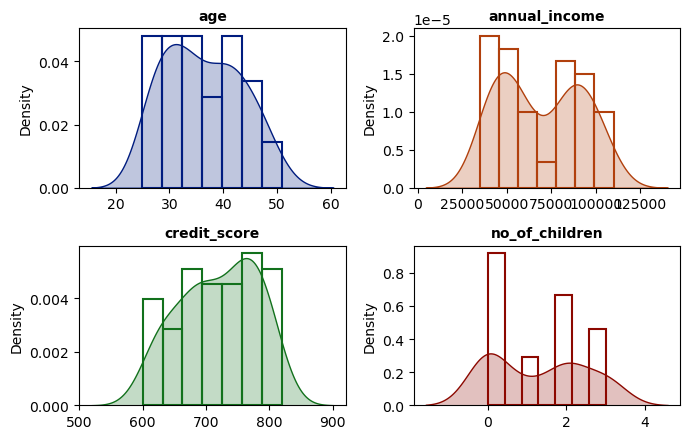

In [13]:
colors = sns.color_palette(palette = 'dark', n_colors = len(numerical_features))

fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 4.5))
axs = axs.flat

for i,feature in enumerate(numerical_features):
    sns.histplot(data, x = feature, stat = 'density', fill = False, color = colors[i], ax = axs[i])
    sns.kdeplot(data, x = feature, fill = True, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(f"{feature}", fontsize = 10, fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()

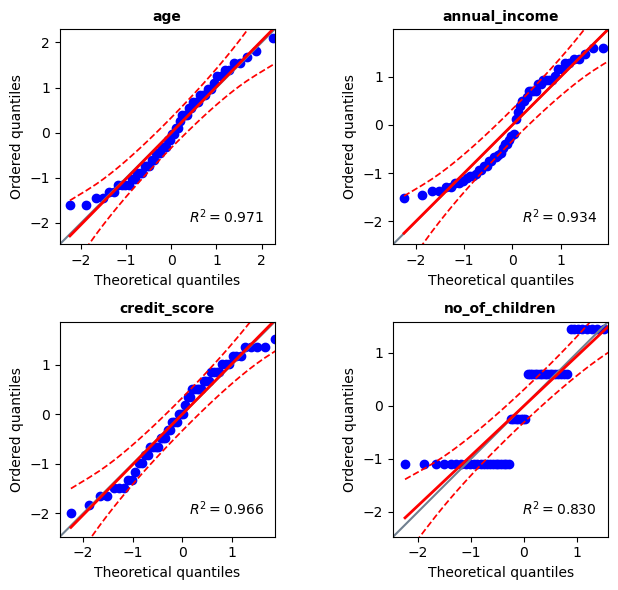

In [14]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 6))
axs = axs.flat

for i,feature in enumerate(numerical_features):
    pg.qqplot(data[feature], ax = axs[i])
    axs[i].set_title(f"{feature}", fontsize = 10, fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()

In [15]:
pg.normality(data[numerical_features], method = 'normaltest')

,W,pval,normal
age,8.633414,1.334375e-02,False
annual_income,37.895215,5.904166e-09,False
credit_score,9.287142,9.623272e-03,False
no_of_children,57.040031,4.110690e-13,False


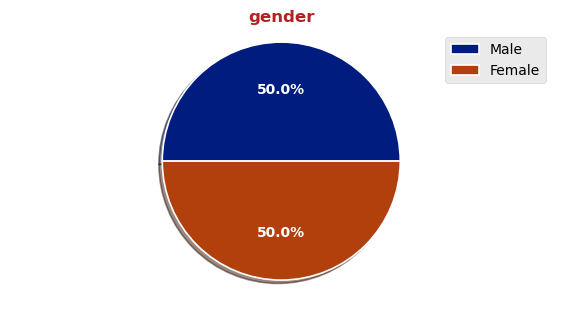

In [16]:
plt.style.use('ggplot')
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[0]]).values()), 
        labels = list(Counter(data[categorical_features[0]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'dark', n_colors = data[categorical_features[0]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[0], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.legend()
plt.axis('equal')
plt.show()

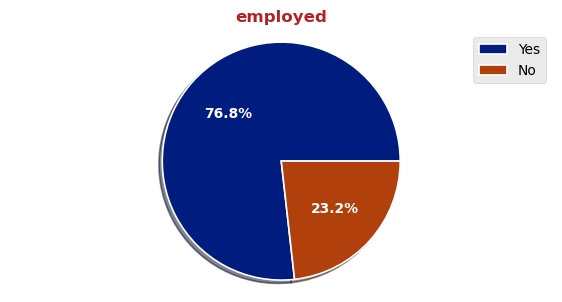

In [17]:
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[1]]).values()), 
        labels = list(Counter(data[categorical_features[1]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'dark', n_colors = data[categorical_features[1]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[1], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.legend()
plt.axis('equal')
plt.show()


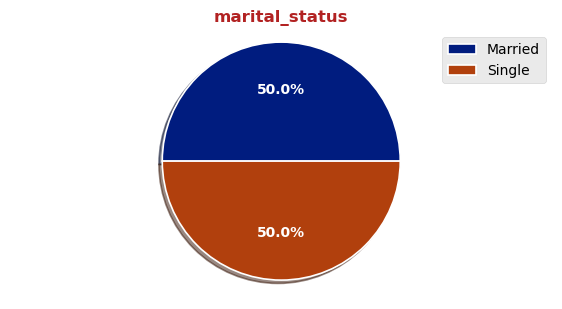

In [18]:
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[2]]).values()), 
        labels = list(Counter(data[categorical_features[2]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'dark', n_colors = data[categorical_features[2]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[2], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.legend()
plt.axis('equal')
plt.show()

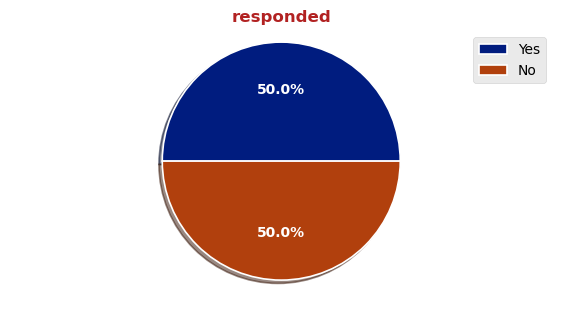

In [19]:
plt.style.use('ggplot')
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[3]]).values()), 
        labels = list(Counter(data[categorical_features[3]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'dark', n_colors = data[categorical_features[3]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':10, 'fontweight':'bold', 'color':'white'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[3], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.legend()
plt.axis('equal')
plt.show()

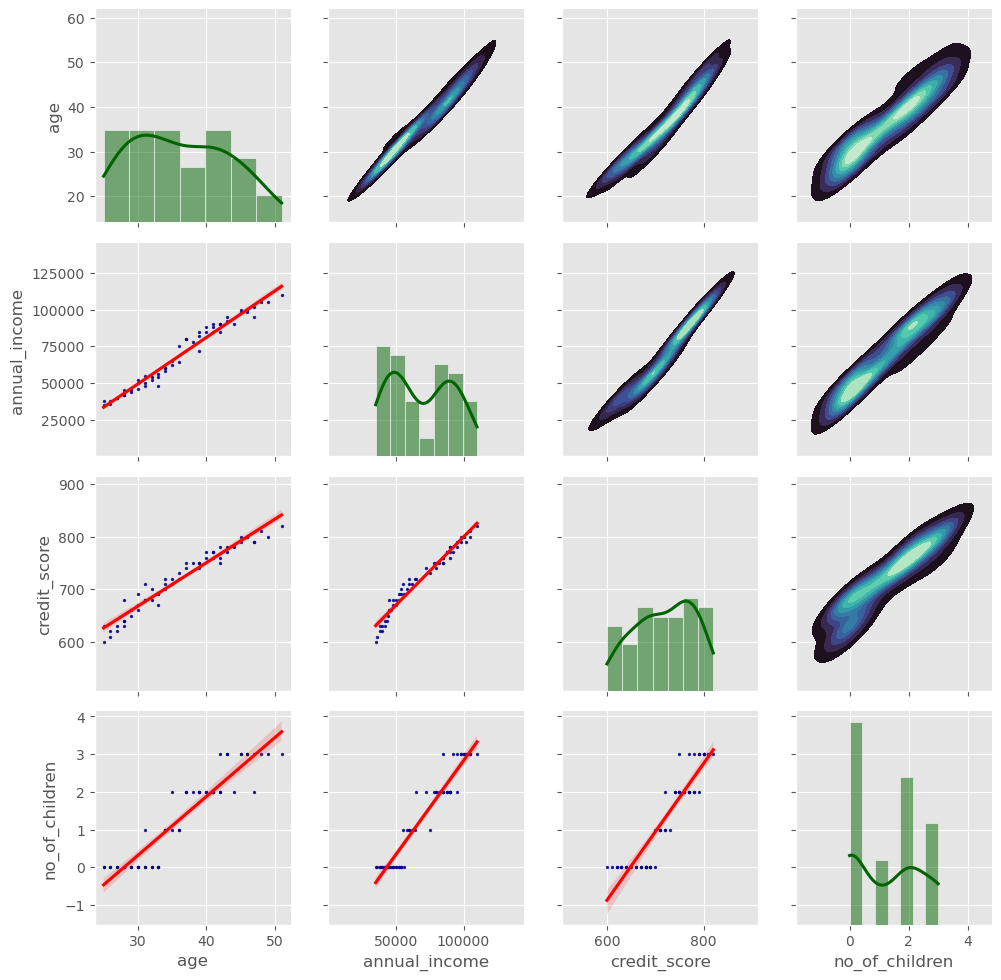

In [20]:
g = sns.PairGrid(data[numerical_features], 
                 palette = 'dark')
g.map_lower(sns.regplot, 
            scatter_kws = {'s':2, 
                           'color':'darkblue'}, 
            line_kws = {'color':'red'})
g.map_diag(sns.histplot, kde = True, line_kws = {'linewidth':2.2}, color = 'darkgreen')
g.map_upper(sns.kdeplot, fill = True, cmap = 'mako')
g.fig.show()

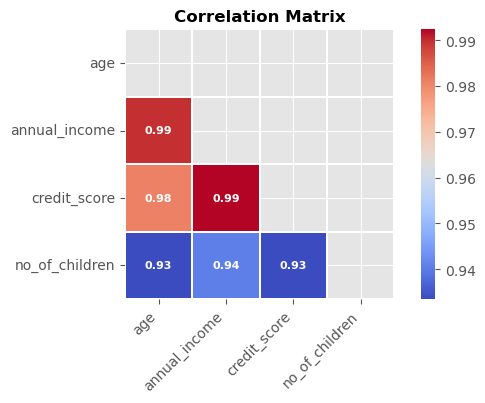

In [21]:
corr_matrix = data[numerical_features].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,3.5))
sns.heatmap(corr_matrix, 
            cmap = 'coolwarm', 
            annot = True, 
            annot_kws = {'fontsize':8, 
                         'fontweight':'bold'},
            linewidths = 1.2,
            square = True, 
            mask = mask, 
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
ax.set_title("Correlation Matrix", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

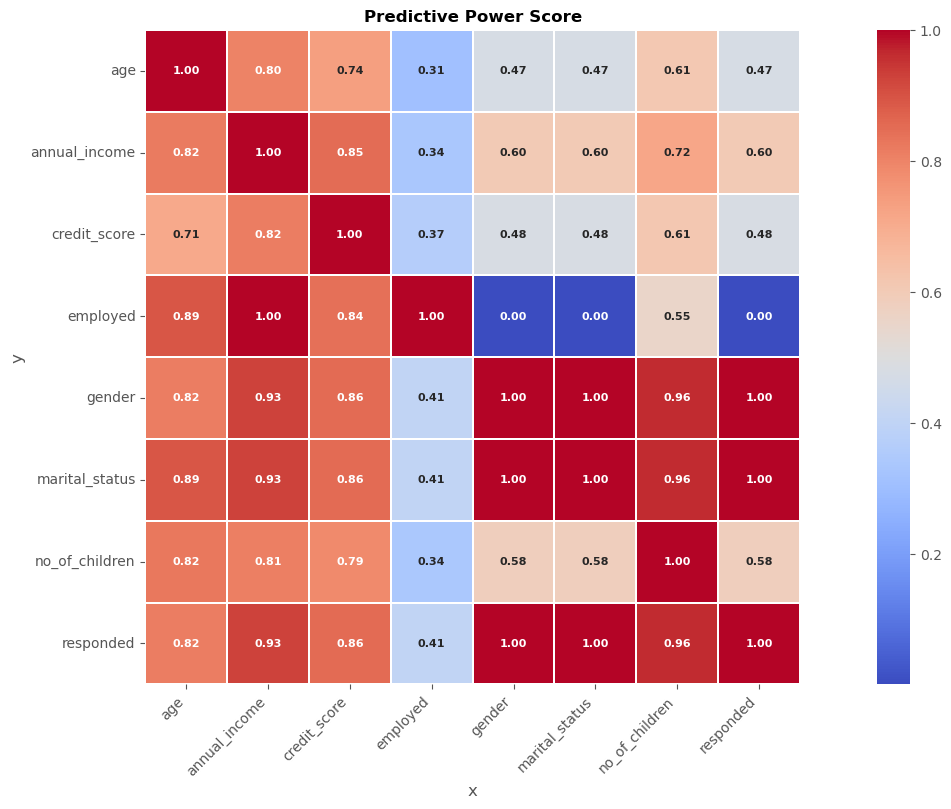

In [22]:
pps_matrix = pps.matrix(data)[['x', 'y', 'ppscore']].pivot_table(values = 'ppscore', 
                                          index = 'y', 
                                          columns = 'x')

fig,ax = plt.subplots(figsize = (20,8.5))
sns.heatmap(pps_matrix, 
            cmap = 'coolwarm', 
            annot = True, 
            annot_kws = {'fontsize':8, 
                         'fontweight':'bold'},
            fmt = '.2f',
            linewidths = 1.2,
            square = True, 
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
ax.set_title("Predictive Power Score", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

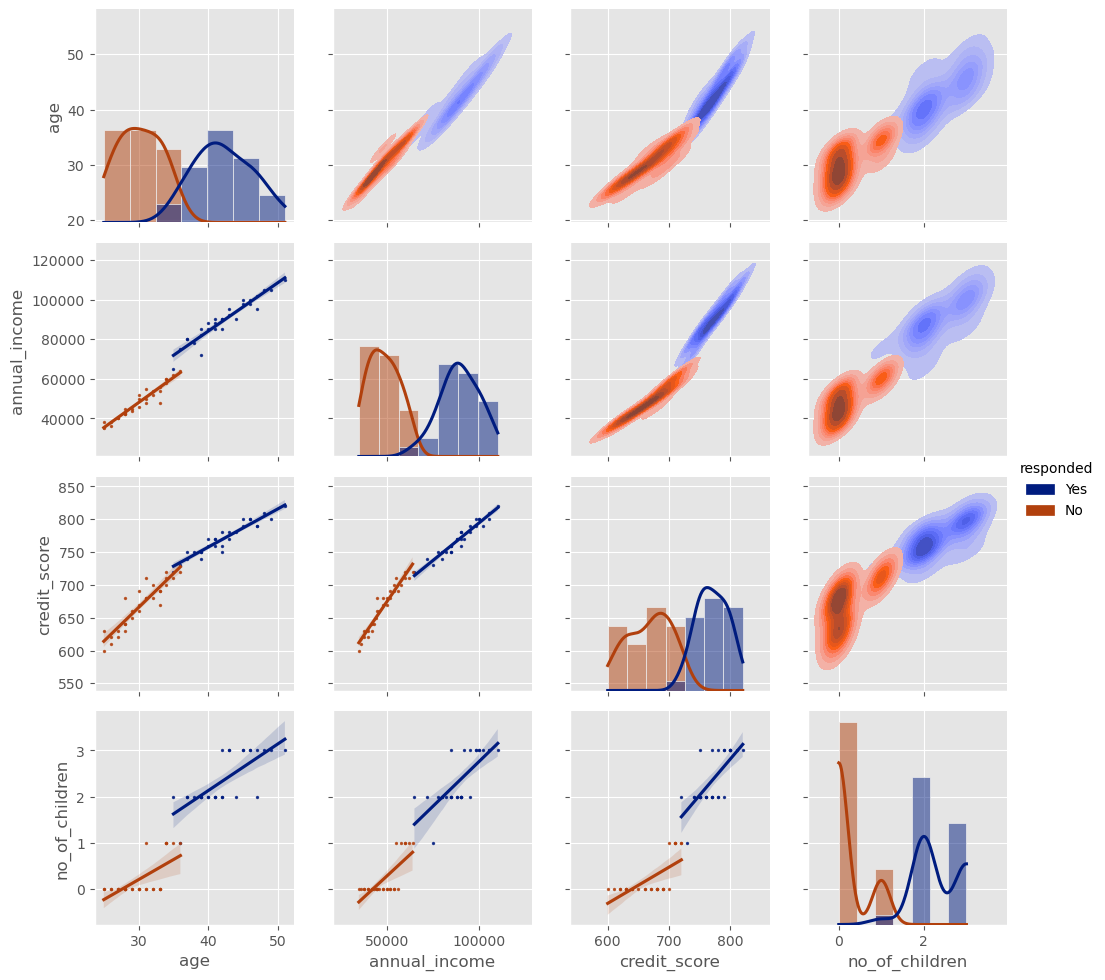

In [23]:
g = sns.PairGrid(data, hue = 'responded', 
                 palette = 'dark')
g.map_lower(sns.regplot, 
            scatter_kws = {'s':2})
g.map_diag(sns.histplot, kde = True, line_kws = {'linewidth':2.2})
g.map_upper(sns.kdeplot, fill = True)
g.add_legend()
g.fig.show()

In [24]:
TARGET = 'responded'
TEST_SIZE = 0.2
SEED = 42

X = data.drop(TARGET, axis = 1)
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = SEED, 
                                                    stratify = y)

In [25]:
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")

y_train: Counter({'Yes': 22, 'No': 22})
y_test: Counter({'Yes': 6, 'No': 6})


In [26]:
numerical_predictors = X_train.select_dtypes(include = ['float','int']).columns.to_list()
categorical_predictors = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()

In [27]:
transformer = [('ohe', 
                OneHotEncoder(drop = 'first', 
                              handle_unknown = 'ignore', 
                              sparse_output = False), 
                categorical_predictors), 
               
               ('scaler', 
               StandardScaler(), 
               numerical_predictors)]

In [28]:
preprocessor = ColumnTransformer(transformers = transformer, 
                                 remainder = 'passthrough', 
                                 n_jobs = -1, 
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [29]:
clf1 = LogisticRegression(random_state = SEED)

clf2 = KNeighborsClassifier(n_jobs = -1)

clf3 = SVC(random_state = SEED, 
           probability = True)

MODELS1 = [clf1, clf2, clf3]

In [30]:
# Training !!!
for model in tqdm(MODELS1):
    name = type(model).__name__

    model.fit(X_train_prep.to_numpy(dtype = np.float32), y_train)

    y_pred_train = model.predict(X_train_prep.to_numpy(dtype = np.float32))
    y_pred_test = model.predict(X_test_prep.to_numpy(dtype = np.float32))
        
        
    score_train = accuracy_score(y_train, y_pred_train)
    score_test = accuracy_score(y_test, y_pred_test)
    
    print("==" * 30)
    print(f"\033[1;33m {name} \033[0;m :\n") 
    print(f' Accuracy Train: {score_train:.4f} |', 
          f'Accuracy Test: {score_test:.4f}\n')
    print("==" * 30)

  0%|          | 0/3 [00:00<?, ?it/s]

 LogisticRegression  :

 Accuracy Train: 1.0000 | Accuracy Test: 1.0000

 KNeighborsClassifier  :

 Accuracy Train: 1.0000 | Accuracy Test: 1.0000

 SVC  :

 Accuracy Train: 1.0000 | Accuracy Test: 1.0000

